### SUGERENCIAS TRAS EL EDA

Ha habido un aumento en los nulos con respecto al dataset anterior. Se sugiere una apuesta conservadora para la gestión de estos nulos (mantenerlos como nulos) para mantener la línea de análisis que ha llevado la empresa hasta el momento.
En cuanto a los duplicados, también ha habido un ligero aumento en los ids duplicados de los apartamentos, para los cuales se sugiere que se eliminen los que correspondan a los anuncios más antiguos.
Se observa un outlier de 6000 € en Valencia que valdría la pena revisar (acommodates 6, quizá el valor aportado es justificado).

In [ ]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
conn = mysql.connector.connect(
    host='212.227.90.6',
    user='Equipo19',
    password='E1q2u3i4p5o19',
    database='Equip_19'
)

cursor = conn.cursor()

# Obtener nombres de tablas
cursor.execute("SHOW TABLES")
tablas = [t[0] for t in cursor.fetchall()]

# Guardar todas las tablas en un diccionario de DataFrames
dfs = {tabla: pd.read_sql(f"SELECT * FROM {tabla}", conn) for tabla in tablas}

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2116393161.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs = {tabla: pd.read_sql(f"SELECT * FROM {tabla}", conn) for tabla in tablas}


In [ ]:
# Aquí se cambia el nombre de la tabla según la entrega
df = dfs['Tourist_Accommodation03112025']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 8000 non-null   int64  
 1   name                         7997 non-null   object 
 2   description                  7946 non-null   object 
 3   host_id                      8000 non-null   int64  
 4   neighbourhood_name           8000 non-null   object 
 5   neighbourhood_district       4861 non-null   object 
 6   room_type                    8000 non-null   object 
 7   accommodates                 8000 non-null   int64  
 8   bathrooms                    7957 non-null   object 
 9   bedrooms                     7961 non-null   object 
 10  beds                         7992 non-null   float64
 11  amenities_list               7983 non-null   object 
 12  price                        7829 non-null   float64
 13  minimum_nights    

In [29]:
df.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date'],
      dtype='object')

In [30]:
df.isnull().sum().sort_values(ascending=False)


neighbourhood_district         3139
review_scores_value            1711
review_scores_location         1711
review_scores_checkin          1710
review_scores_accuracy         1705
review_scores_communication    1701
review_scores_cleanliness      1699
review_scores_rating           1696
last_review_date               1615
first_review_date              1614
reviews_per_month              1614
has_availability                550
price                           171
description                      54
bathrooms                        43
bedrooms                         39
amenities_list                   17
beds                              8
name                              3
is_instant_bookable               0
country                           0
city                              0
apartment_id                      0
availability_60                   0
number_of_reviews                 0
availability_365                  0
availability_90                   0
availability_30             

In [31]:
# COMPROBACIÓN FILAS DUPLICADAS

duplicados = df.duplicated()

duplicados.sum()

0

In [ ]:
# COMPROBACIÓN APARTMENT_ID DUPLICADOS
duplicados_id = df.duplicated(subset=['apartment_id'])

duplicados_id.sum()

307

In [32]:
dfnumerics = df
dfnumerics = dfnumerics.drop('apartment_id', axis=1)
dfnumerics= dfnumerics.drop('host_id',axis=1)
stadistics = dfnumerics.describe().round(2)
stadistics

,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,8000.00,7992.00,7829.00,8000.00,8000.00,8000.00,8000.00,8000.0,8000.00,8000.00,6304.00,6295.00,6301.00,6290.00,6299.00,6289.00,6289.00,6386.00
mean,4.33,2.97,1007.75,4.57,761.23,12.39,27.61,44.6,188.34,31.36,919.70,94.56,93.16,96.28,96.35,95.32,91.41,125.47
std,2.59,2.29,844.35,11.81,497.95,11.52,22.41,33.0,129.64,57.08,89.07,9.24,9.96,8.04,7.93,7.51,9.64,155.40
min,1.00,0.00,60.00,1.00,1.00,0.00,0.00,0.0,0.00,0.00,200.00,20.00,20.00,20.00,20.00,20.00,20.00,1.00
25%,2.00,1.00,450.00,1.00,62.00,0.00,2.00,9.0,67.00,1.00,890.00,90.00,90.00,90.00,90.00,90.00,90.00,17.00
50%,4.00,2.00,750.00,2.00,1125.00,10.00,27.00,47.0,190.00,8.00,940.00,100.00,100.00,100.00,100.00,100.00,90.00,58.00
75%,6.00,4.00,1220.00,4.00,1125.00,24.00,50.00,76.0,316.00,36.00,980.00,100.00,100.00,100.00,100.00,100.00,100.00,181.00
max,29.00,30.00,6071.00,365.00,1125.00,30.00,60.00,90.0,365.00,588.00,1000.00,100.00,100.00,100.00,100.00,100.00,100.00,1291.00


In [ ]:
# stadistics.to_csv('stadistics Equip_19.csv',index=False)

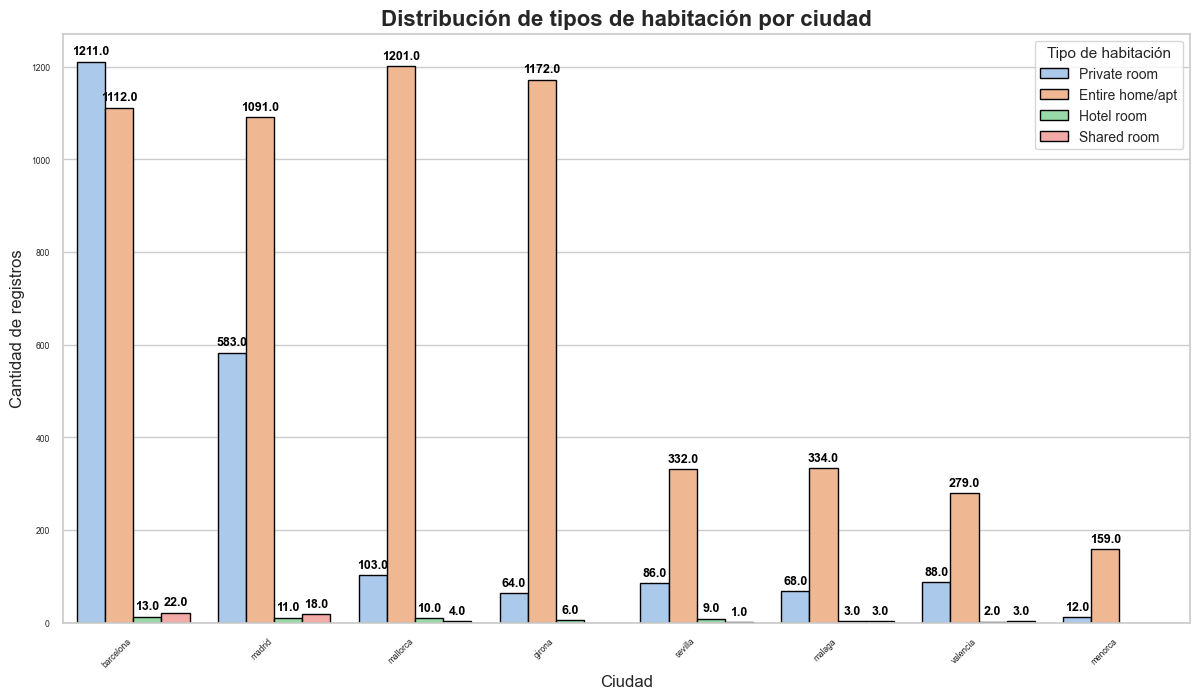

In [99]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=df,
    x="city",
    hue="room_type",
    order=df['city'].value_counts().index, 
    palette="pastel",                       
    edgecolor="black"
)

ax.set_title("Distribución de tipos de habitación por ciudad", fontsize=16, fontweight="bold")
ax.set_xlabel("Ciudad", fontsize=12)
ax.set_ylabel("Cantidad de registros", fontsize=12)

plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(
            f'{height}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, fontweight='bold', color='black',
            xytext=(0, 3), textcoords='offset points'
        )

plt.legend(title="Tipo de habitación", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


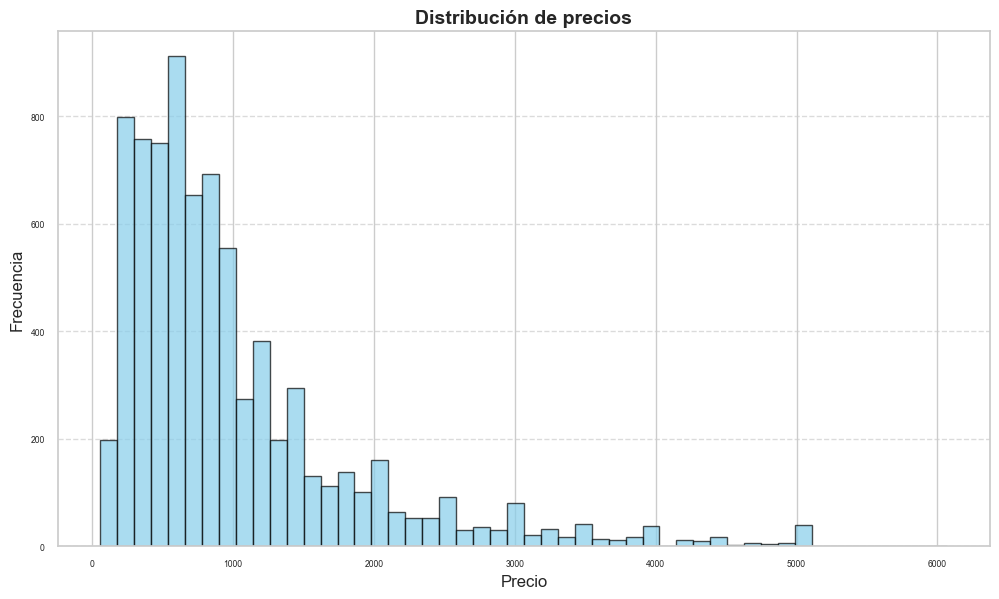

In [89]:
plt.figure(figsize=(10,6))
ax = df['price'].hist(
    bins=50, 
    color='skyblue', 
    edgecolor='black', 
    alpha=0.7
)

# Títulos y etiquetas
ax.set_title("Distribución de precios", fontsize=14, fontweight='bold')
ax.set_xlabel("Precio", fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)

# Añadir grid discreto
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

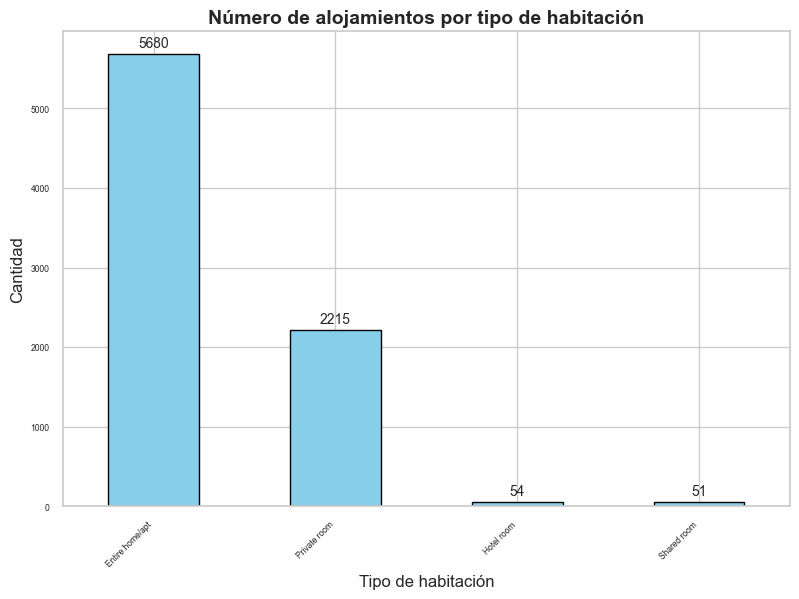

In [ ]:
counts = df['room_type'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))
bars = counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)


ax.set_title("Número de alojamientos por tipo de habitación", fontsize=14, fontweight='bold')
ax.set_xlabel("Tipo de habitación", fontsize=12)
ax.set_ylabel("Cantidad", fontsize=12)

plt.xticks(rotation=45, ha='right')

ax.bar_label(ax.containers[0], fmt='%d', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [84]:
df.groupby('neighbourhood_name')['price'].mean().sort_values(ascending=False).round(2)

neighbourhood_name
Ripoll                 4160.00
Torrent                4000.00
Forallac               3345.00
Riudarenes             3190.00
La Bisbal d'Emporda    2845.00
                        ...   
LA VEGA BAIXA           180.00
San Cristobal           156.67
Abrantes                140.00
Consell                    NaN
Vidr�                      NaN
Name: price, Length: 492, dtype: float64

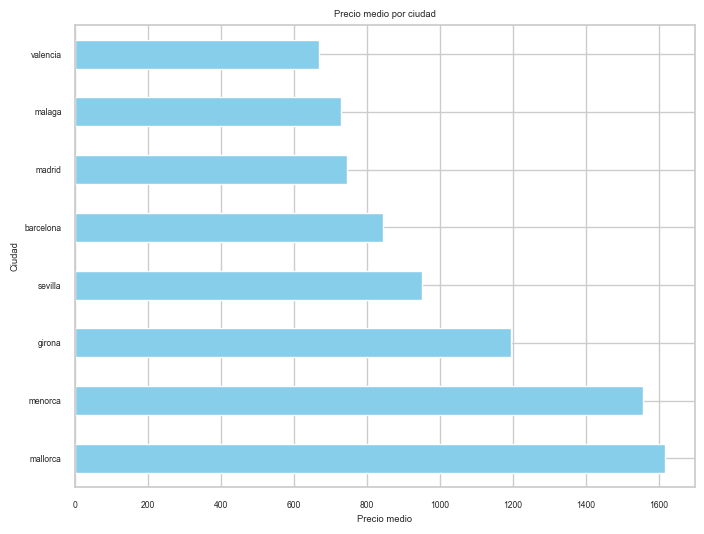

In [78]:
df.groupby('city')['price'].mean().sort_values(ascending=False).round(2).plot(
    kind='barh', figsize=(8,6), color='skyblue'
)
plt.xlabel("Precio medio")
plt.ylabel("Ciudad")
plt.title("Precio medio por ciudad")
plt.show()

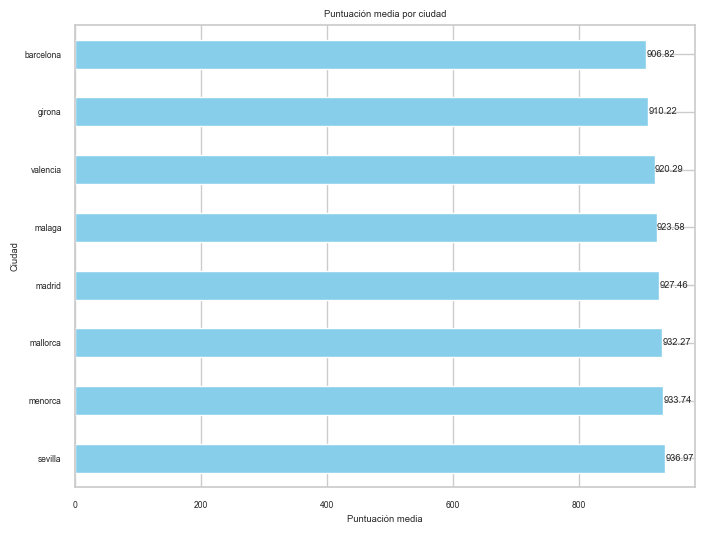

In [83]:
mean_scores = df.groupby('city')['review_scores_rating'].mean().sort_values(ascending=False).round(2)
fig, ax = plt.subplots(figsize=(8,6))
bars = mean_scores.plot(kind='barh', color='skyblue', ax=ax)
ax.set_xlabel("Puntuación media")
ax.set_ylabel("Ciudad")
ax.set_title("Puntuación media por ciudad")
ax.bar_label(ax.containers[0], fmt="%.2f")

plt.show()

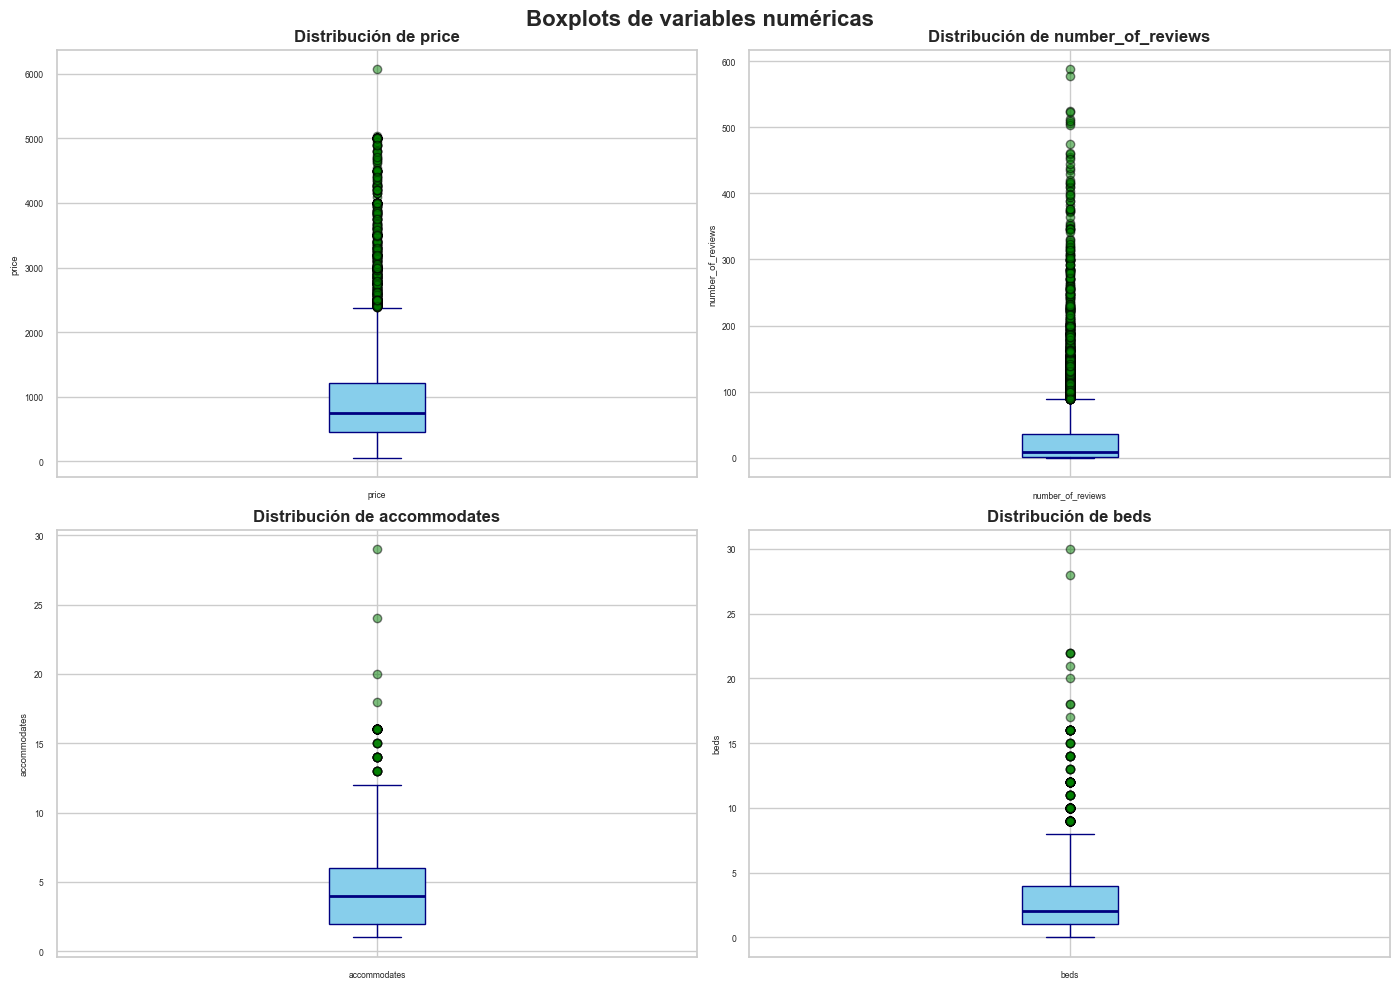

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

columnas = ['price', 'number_of_reviews', 'accommodates', 'beds']

for ax, col in zip(axes.flatten(), columnas):
    df.boxplot(column=col, ax=ax, patch_artist=True,
               boxprops=dict(facecolor='skyblue', color='navy'),
               medianprops=dict(color='navy', linewidth=2),
               whiskerprops=dict(color='navy'),
               capprops=dict(color='navy'),
               flierprops=dict(marker='o', markerfacecolor='green', alpha=0.5))
    ax.set_title(f"Distribución de {col}", fontsize=12, fontweight='bold')
    ax.set_ylabel(col)

plt.suptitle("Boxplots de variables numéricas", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

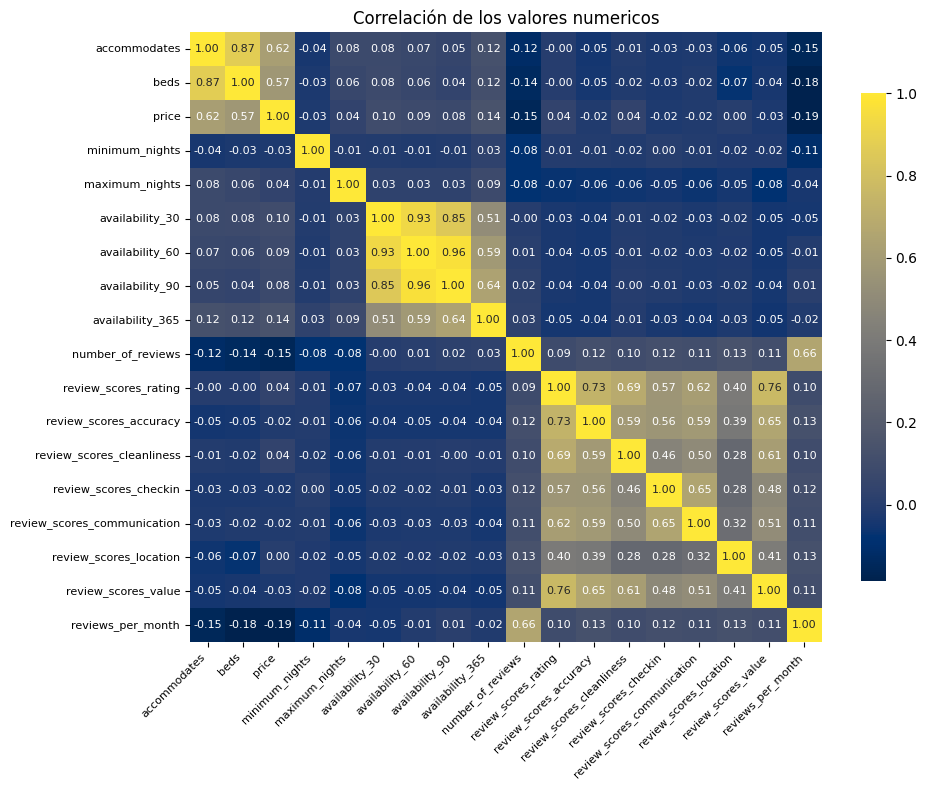

In [39]:
correl = dfnumerics.select_dtypes('number')

plt.figure(figsize=(10, 8))
sns.heatmap(
    correl.corr(),
    annot=True,
    cmap='cividis',
    fmt=".2f",                      # limits to 2 decimals
    annot_kws={"size": 8},          # controls number text size
    cbar_kws={"shrink": 0.8}        # makes colorbar smaller
)
plt.title(
    'Correlación de los valores numericos',
    fontsize=12                     # smaller title
)
plt.xticks(fontsize=8, rotation=45, ha='right')  # smaller rotated labels
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [40]:
roomsFilter = df.loc[:,
                     ['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
                    'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
                    'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
                    'maximum_nights', 'has_availability', 'availability_30',
                    'availability_60', 'availability_90', 'availability_365','city'
                         
                     ]
                     ]
roomsFilter

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,city
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,malaga
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,madrid
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,sevilla
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,barcelona
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,...,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,girona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32392193,Espectacular habitaci�n,None,238089984,Sant Antoni,Eixample,Private room,1,1,1,...,"TV,Wifi,Elevator,Heating,Washer,Essentials,Sha...",3000.0,32,1125,VERDADERO,28,58,88,363,barcelona
7996,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire home/apt,6,2,3,...,"Patio or balcony, Long term stays allowed, Sha...",2090.0,2,60,VERDADERO,0,11,41,41,sevilla
7997,32395123,Rooms by G Bella Mar�a 3,The 2-star Bella Maria has 24-hourreception an...,159933359,Felanitx,None,Entire home/apt,2,1,1,...,"Air conditioning,Pool,Kitchen,Free parking on ...",930.0,1,1125,VERDADERO,23,53,83,184,mallorca
7998,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Proven�als del Poblenou,Sant Mart�,Private room,3,2,2,...,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",960.0,2,15,VERDADERO,1,17,40,315,barcelona


In [41]:
reviewsFilter = df.loc[:,
                       ['number_of_reviews', 'first_review_date', 'last_review_date',
                        'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month','city','insert_date'
                           
                       ]
                       ]
reviewsFilter

,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
0,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,malaga,31/07/2018
1,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,madrid,10/01/2020
2,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,sevilla,29/07/2019
3,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,barcelona,10/01/2020
4,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,girona,19/02/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,barcelona,16/10/2019
7996,36,17/03/2019,09/09/2020,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,157.0,sevilla,31/01/2021
7997,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,mallorca,24/04/2019
7998,21,04/03/2019,28/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,389.0,barcelona,12/08/2019


In [42]:
rooms = df.loc[:,
                ['accommodates', 'bathrooms',
                'bedrooms', 'beds', 'price', 'minimum_nights',
                'maximum_nights', 'availability_30',
                'availability_60', 'availability_90', 'availability_365']
               ]
rooms

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365
0,2,2,1,1.0,400.0,3,365,7,20,40,130
1,1,1,1,1.0,170.0,4,40,0,0,0,162
2,4,1,2,2.0,990.0,2,120,26,31,31,270
3,2,2,1,1.0,400.0,2,730,9,23,49,300
4,5,1,2,5.0,900.0,1,180,0,19,49,312
...,...,...,...,...,...,...,...,...,...,...,...
7995,1,1,1,1.0,3000.0,32,1125,28,58,88,363
7996,6,2,3,4.0,2090.0,2,60,0,11,41,41
7997,2,1,1,2.0,930.0,1,1125,23,53,83,184
7998,3,2,2,2.0,960.0,2,15,1,17,40,315


In [43]:
reviews = df.loc[:, 
                    ['number_of_reviews', 'first_review_date', 'last_review_date',
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value']
                    ]
reviews


,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0
1,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0
2,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0
3,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0
4,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
7995,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,36,17/03/2019,09/09/2020,1000.0,100.0,100.0,100.0,100.0,100.0,100.0
7997,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,21,04/03/2019,28/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0


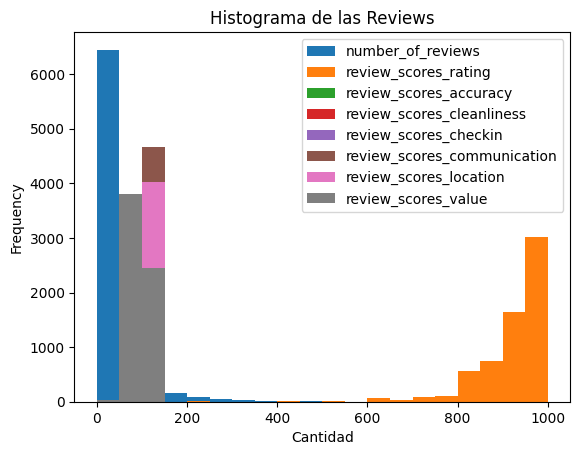

In [44]:
reviewsPlot = reviews.plot.hist(bins=20)
plt.title('Histograma de las Reviews')
plt.xlabel('Cantidad')
plt.show()

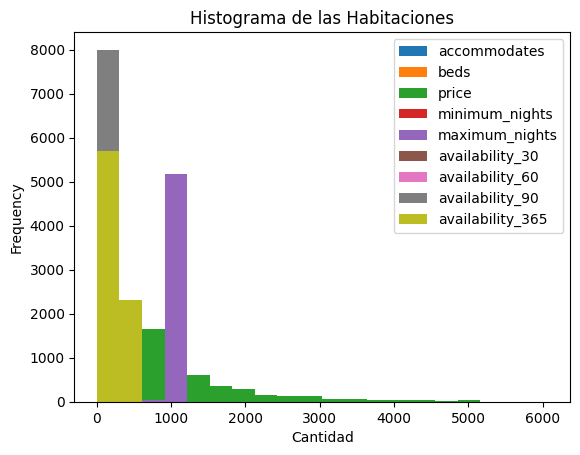

In [45]:
roomsPlot = rooms.plot.hist(bins=20)
plt.title('Histograma de las Habitaciones')
plt.xlabel('Cantidad')
plt.show()

<Figure size 5000x600 with 0 Axes>

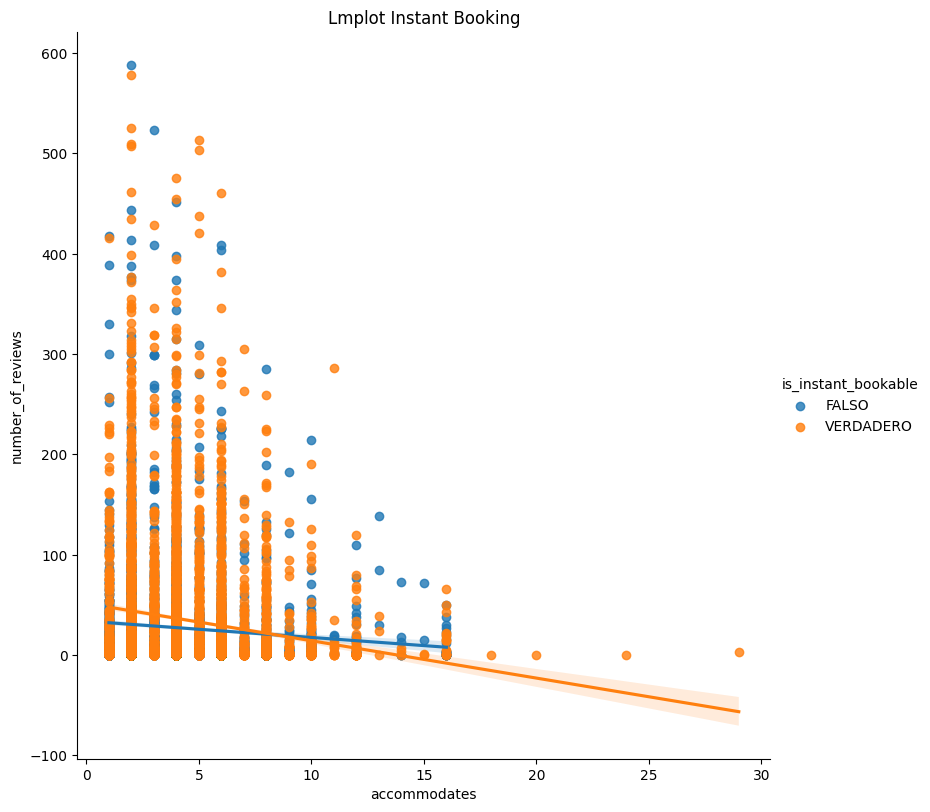

In [46]:
plt.figure(figsize=(50, 6))
sns.lmplot(data = df, x='accommodates', y='number_of_reviews',hue = 'is_instant_bookable',height=8)
plt.title('Lmplot Instant Booking')
plt.show()

<Figure size 5000x600 with 0 Axes>

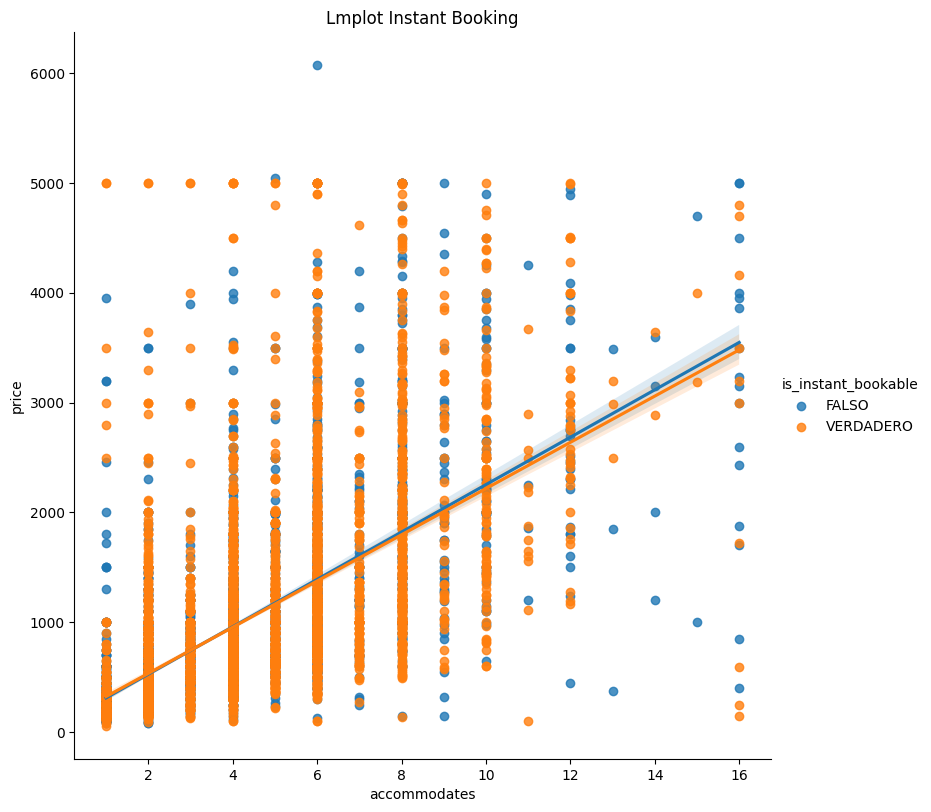

In [47]:
plt.figure(figsize=(50, 6))
sns.lmplot(data = df, x='accommodates', y='price',hue = 'is_instant_bookable',height=8)
plt.title('Lmplot Instant Booking')
plt.show()

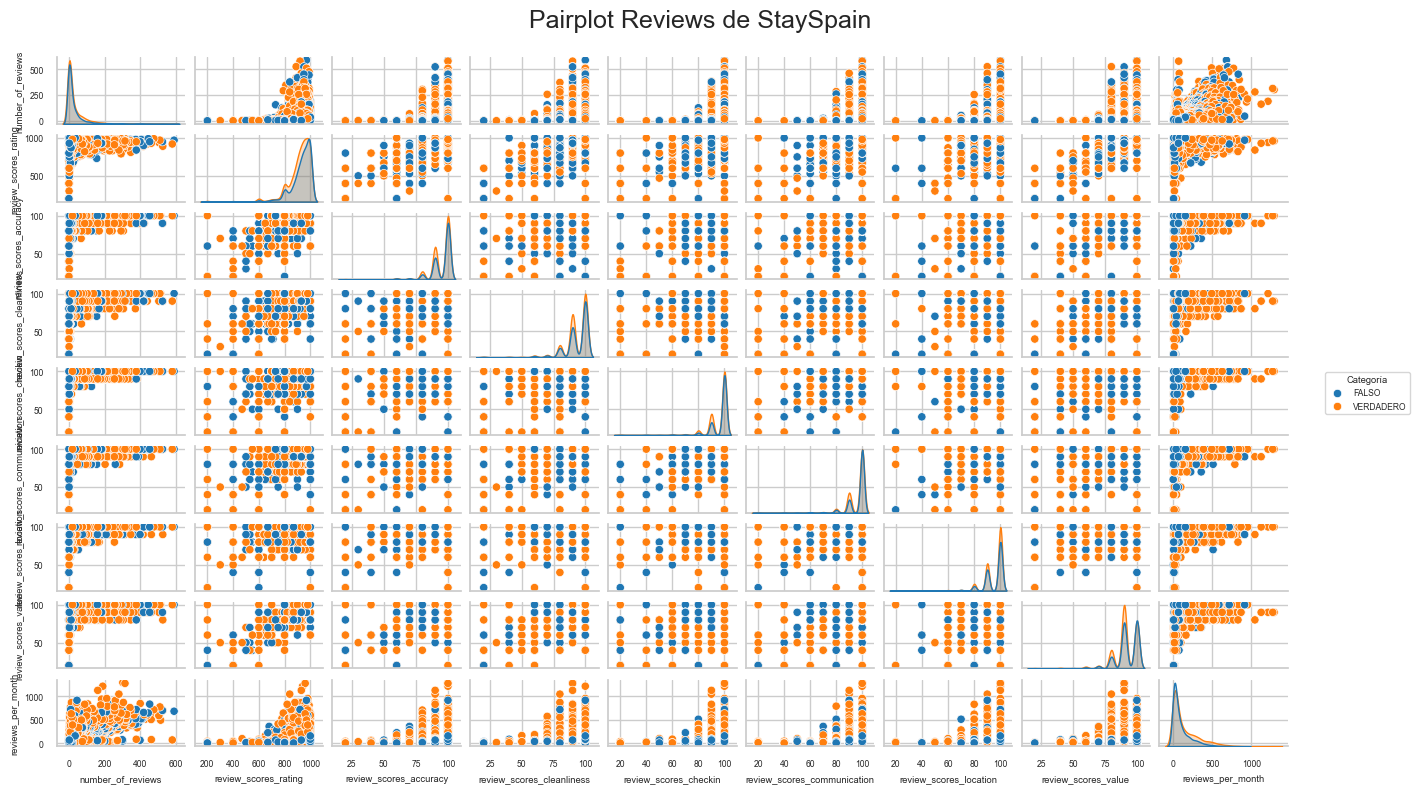

In [ ]:
sns.set_context("notebook", font_scale=0.56) 
sns.set_style("whitegrid")
plot = sns.pairplot(reviewsFilter,hue='is_instant_bookable')

plot.fig.set_size_inches(14, 8)  # (ancho, alto)

plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.92, right=0.92)

plot.fig.suptitle('Pairplot Reviews de StaySpain', fontsize=18)

plot._legend.set_bbox_to_anchor((1.01, 0.5))  # (x, y) → x > 1 para que salga fuera  # opción para ponerle un borde
plot._legend.set_title("Categoría")  # cambia el título de la leyenda si quieres
plot._legend.set_frame_on(True)

plt.show()

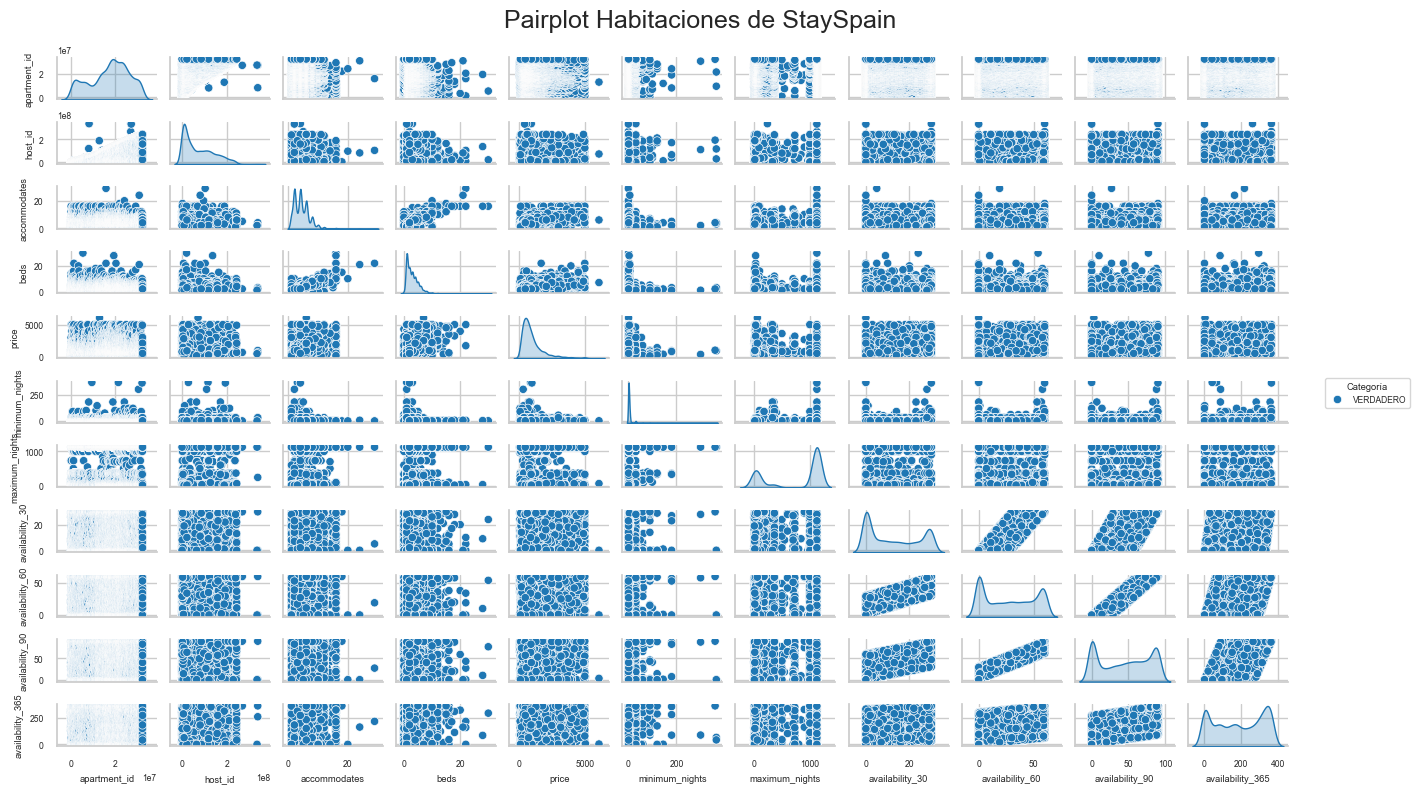

In [ ]:
sns.set_context("notebook", font_scale=0.56) 
sns.set_style("whitegrid")
plot = sns.pairplot(roomsFilter,hue='has_availability')

plot.fig.set_size_inches(14, 8)  # (ancho, alto)

plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.92, right=0.92)

plot.fig.suptitle('Pairplot Habitaciones de StaySpain', fontsize=18)

plot._legend.set_bbox_to_anchor((1.01, 0.5))  # (x, y) → x > 1 para que salga fuera  # opción para ponerle un borde
plot._legend.set_title("Categoría")  # cambia el título de la leyenda si quieres
plot._legend.set_frame_on(True)

plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2570435625.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='accommodates', ylabel='price'>

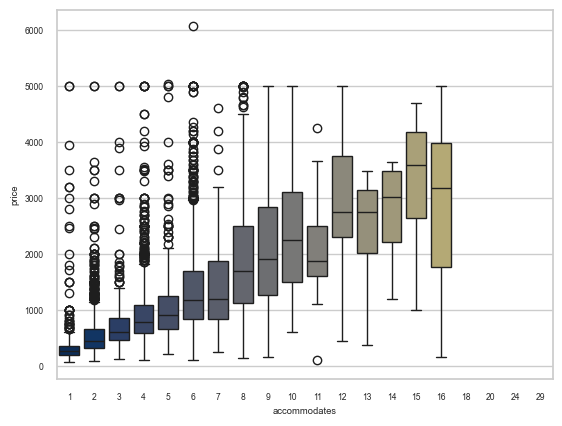

In [71]:
sns.boxplot(
    data=dfnumerics,
    x='accommodates',
    y='price',
    palette='cividis'
)


In [51]:
reviewsFilter

,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
0,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,malaga,31/07/2018
1,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,madrid,10/01/2020
2,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,sevilla,29/07/2019
3,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,barcelona,10/01/2020
4,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,girona,19/02/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,barcelona,16/10/2019
7996,36,17/03/2019,09/09/2020,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,157.0,sevilla,31/01/2021
7997,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,mallorca,24/04/2019
7998,21,04/03/2019,28/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,389.0,barcelona,12/08/2019


C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\1511481106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='number_of_reviews'>

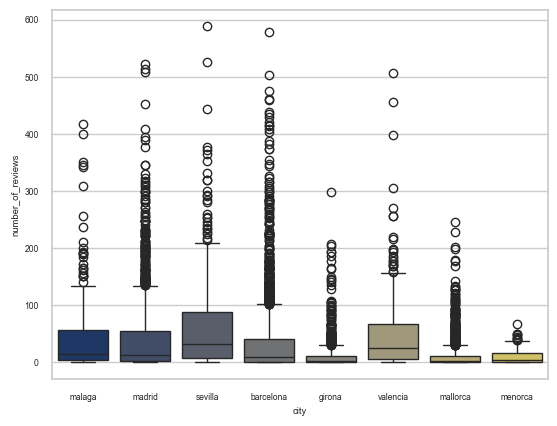

In [52]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='number_of_reviews',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\3277157076.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='price'>

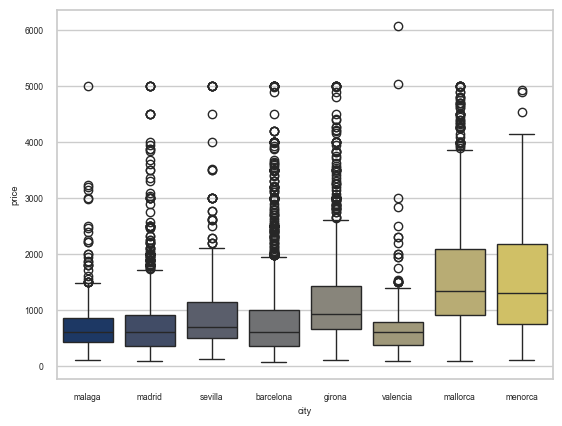

In [53]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='price',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2958375681.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='room_type', ylabel='price'>

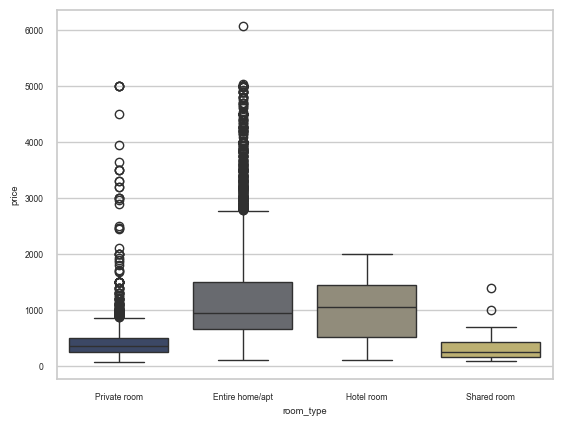

In [54]:
sns.boxplot(
    data=roomsFilter,
    x='room_type',
    y='price',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\1233295759.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='bedrooms', ylabel='price'>

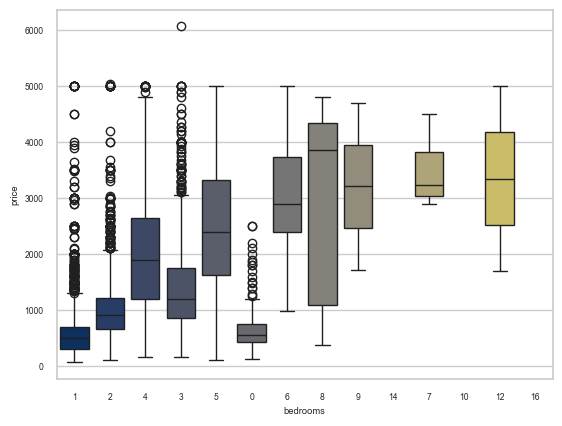

In [57]:
sns.boxplot(
    data=roomsFilter,
    x='bedrooms',
    y='price',
    palette='cividis'
)

In [58]:
reviewsFilter

,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
0,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,malaga,31/07/2018
1,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,madrid,10/01/2020
2,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,sevilla,29/07/2019
3,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,barcelona,10/01/2020
4,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,girona,19/02/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,barcelona,16/10/2019
7996,36,17/03/2019,09/09/2020,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,157.0,sevilla,31/01/2021
7997,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,mallorca,24/04/2019
7998,21,04/03/2019,28/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,389.0,barcelona,12/08/2019


C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2974616239.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='reviews_per_month'>

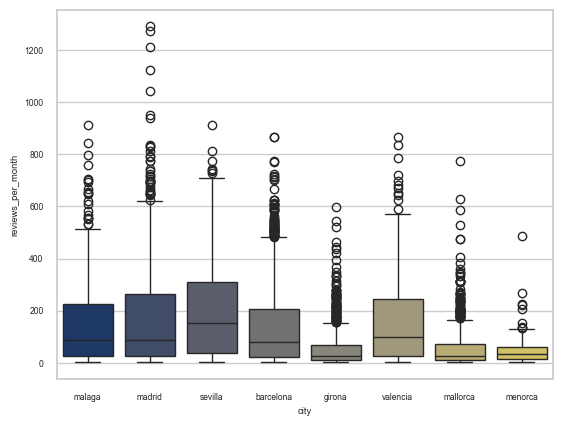

In [59]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='reviews_per_month',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\2798830327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='review_scores_rating'>

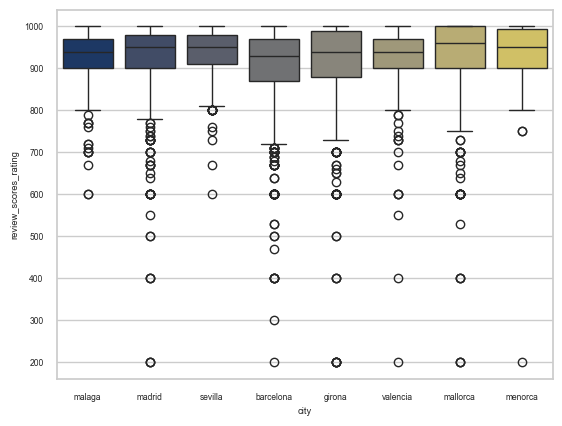

In [60]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='review_scores_rating',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\1095599709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='review_scores_value'>

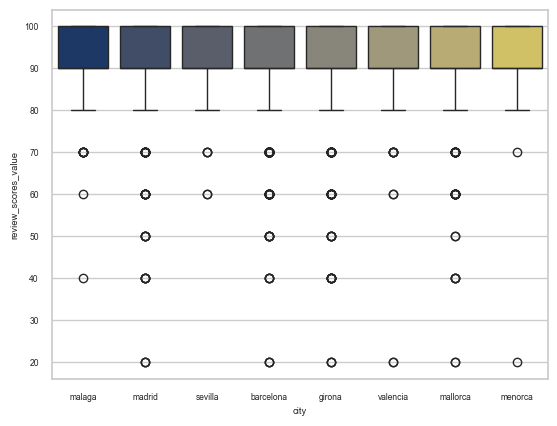

In [61]:
sns.boxplot(
    data=reviewsFilter,
    x='city',
    y='review_scores_value',
    palette='cividis'
)

In [62]:
roomsFilter.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365', 'city'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\695336772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_30'>

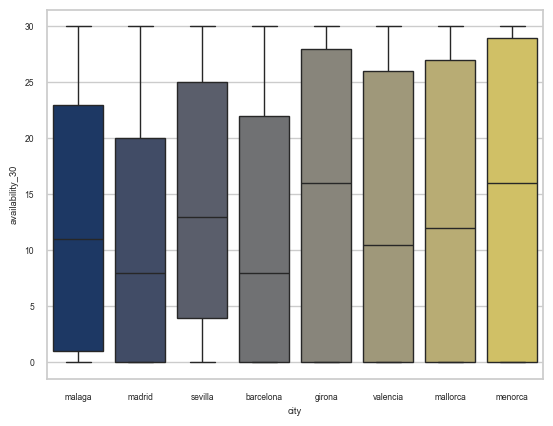

In [63]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_30',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\3556815173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_60'>

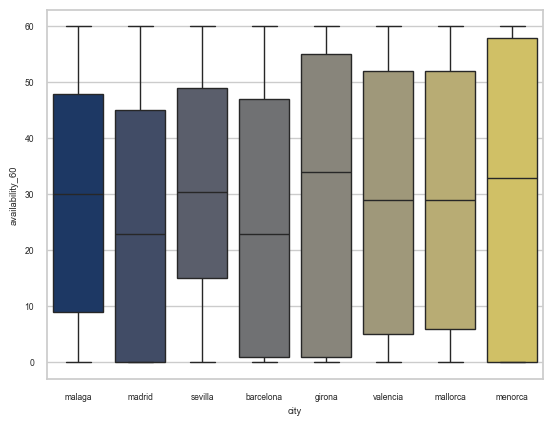

In [64]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_60',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\3260253664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_90'>

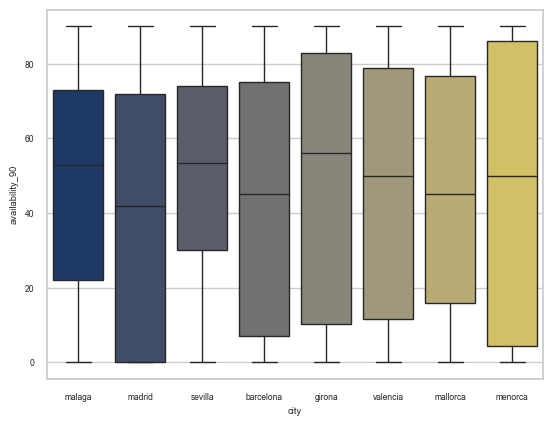

In [65]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_90',
    palette='cividis'
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25748\1577553409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='city', ylabel='availability_365'>

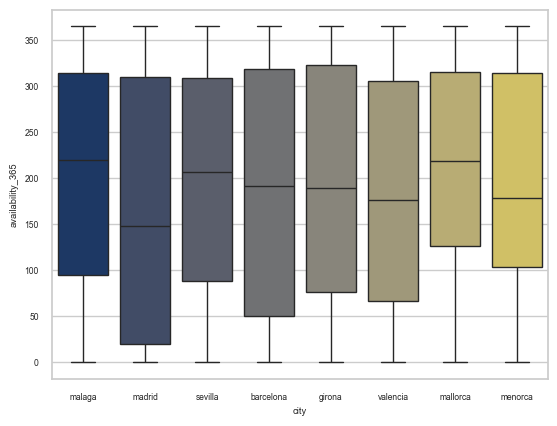

In [66]:
sns.boxplot(
    data=roomsFilter,
    x='city',
    y='availability_365',
    palette='cividis'
)